#**Reconocimiento de objetos**

## 1.  Habilitar Google drive


In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.   Importar librerías
 

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

## 3.   Cargar clasificador Haar


In [0]:
face_cascade= cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml')
#Cargar imagen  desde Google Drive
img = cv2.imread("/content/drive/My Drive/IA/Computer_vision/Images/caras.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## 4. Identificar rostros en la imagen (detectMultiScale)


In [0]:
faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30))
print(faces)


[[252  41  73  73]
 [153  43  91  91]
 [323  45  83  83]
 [ 72  51  94  94]
 [  3  55  68  68]
 [400  63  80  80]
 [474  78  86  86]
 [565  83  73  73]]


## 5. Dibujamos rectángulos de color verde tomando como base las coordenadas guardadas en la matriz faces

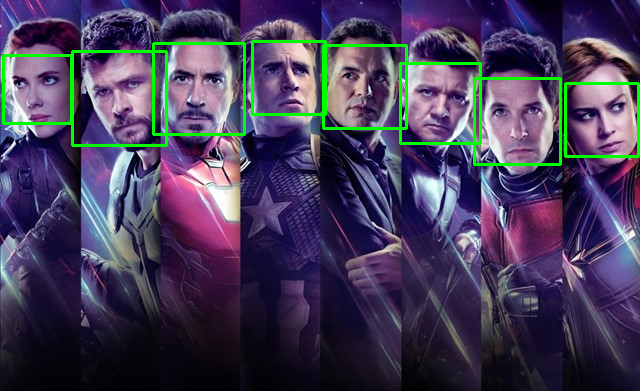

In [0]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv2_imshow(img)   

## 6.  Código completo y mejorado (que nos enumere las caras)


[[252  42  73  73]
 [  2  54  69  69]
 [150  42  96  96]
 [320  42  85  85]
 [397  61  85  85]
 [569  84  69  69]
 [474  78  87  87]
 [ 76  54  89  89]]


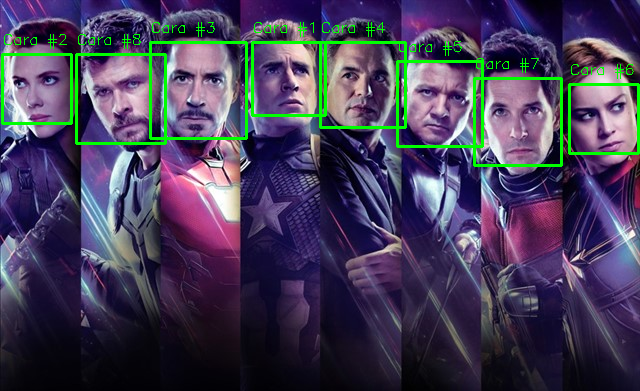

True

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml');
img = cv2.imread("/content/drive/My Drive/IA/Computer_vision/Images/caras.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.3,2);
print(faces)
idx=0
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  idx += 1
  cv2.putText(img,"Cara #{}".format(idx),(x,y-10),
  cv2.FONT_HERSHEY_SIMPLEX,.5,(0,255,0),1)
cv2_imshow(img)
cv2.imwrite('/content/drive/My Drive/IA/Computer_vision/Images/caras_detectadas.jpg',img)


# **Clasificador de cascada - Haar**

## 0.   ver video en Google colaboratory


In [4]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/drive/My Drive/IA/Computer_vision/Images/familia_cantando.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

## 1.   Cargar video de Google drive con opencv


In [0]:
videoentrada = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_vision/Images/familia_cantando.mp4')

## 2.  Conociendo sus características 


In [6]:
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
totalframes = int(cv2.VideoCapture.get(videoentrada, property_id))
print( "total de frames: "+str(totalframes) )
print(str(videoentrada.get(3))+"x"+str(videoentrada.get(4))+" pixeles")

total de frames: 1412
640.0x360.0 pixeles


### 2.1. extrayendo solo unos frames


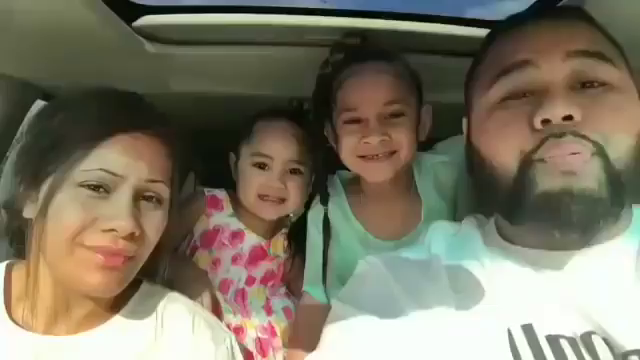

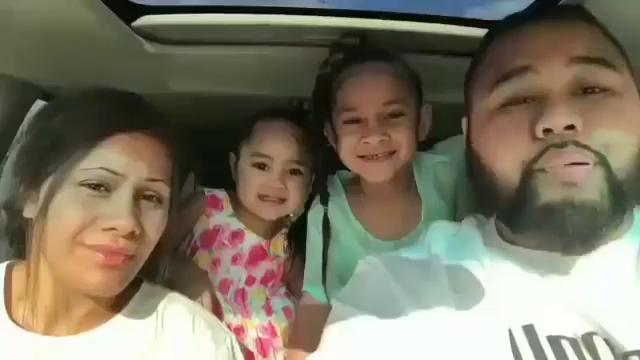

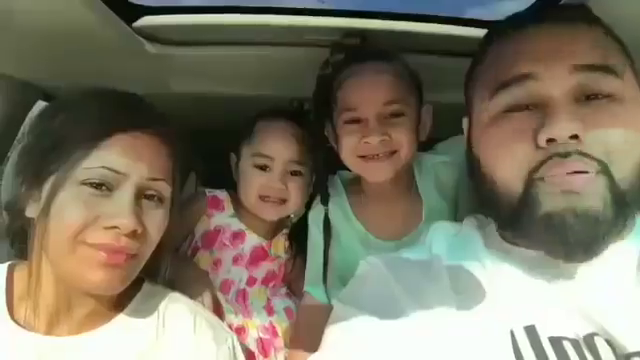

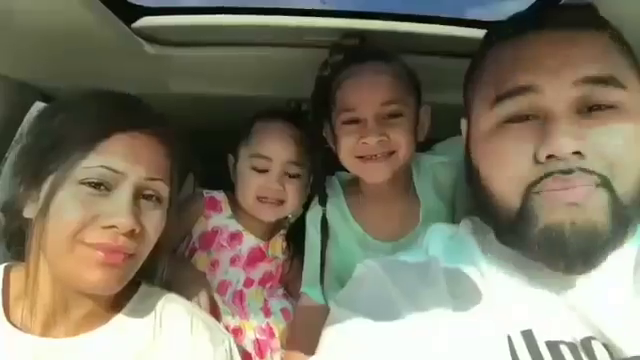

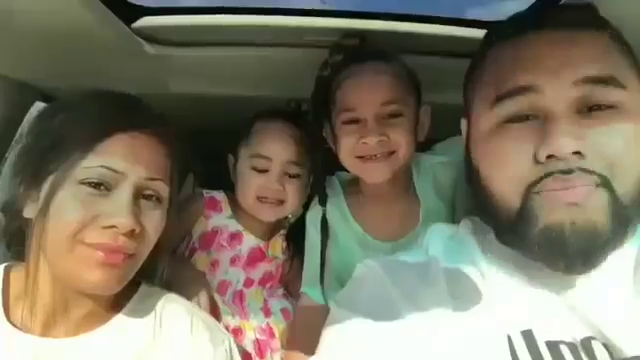

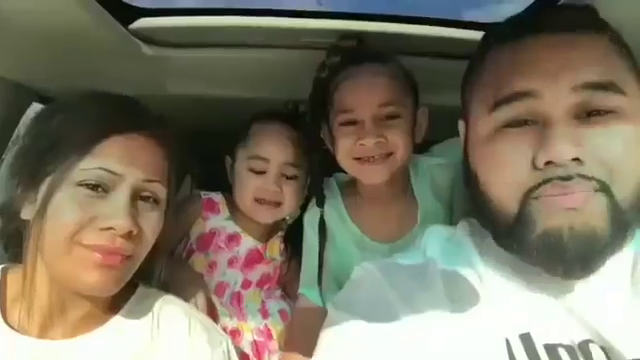

In [7]:
#recorremos los 6 primeros frames de 1412
for x in range(6):
  videoentrada.set(1,x);   
  #ret: retorno (true si es frame se lee correctamente)
  ret, frame = videoentrada.read()
  cv2_imshow(frame)


### 2.2. Recorriendo todo el video pero borra temporales



In [0]:
while(videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    # Nuestras operaciones sobre los frames se hacen aqui
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  else:
    break  
videoentrada.release()

## 3.   Cargamos el clasificador haar 


In [0]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml')

## 4.   Aplicar filtro gris a cada frame del video


In [0]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

## 5.   Aplicamos el clasificador haar a la imagen gris

In [0]:
faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)

## 6.   Dibujamos rectángulos en los lugares que se identificaron caras


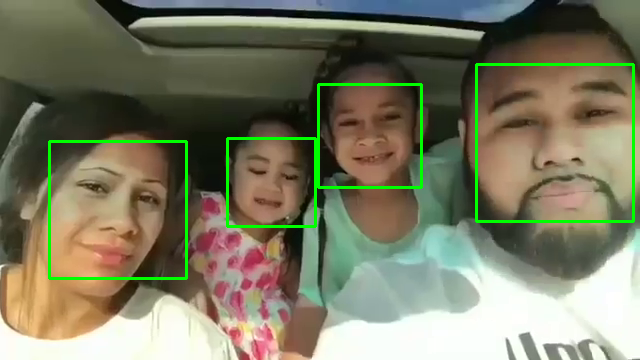

In [11]:
for (x, y, w, h) in faces:
    cv2.rectangle(frame,(x,y),(x+w, y+h),(0, 255, 0),2)
cv2_imshow(frame)


## 7.   Aplicando todo


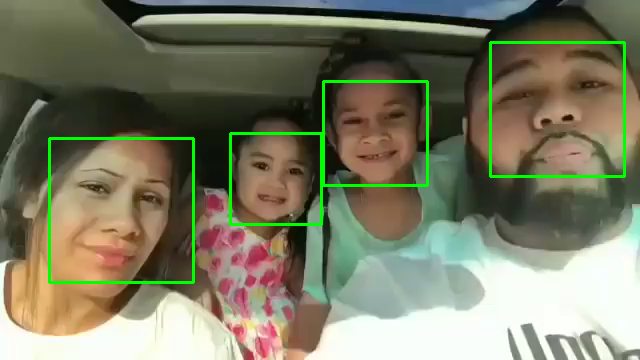

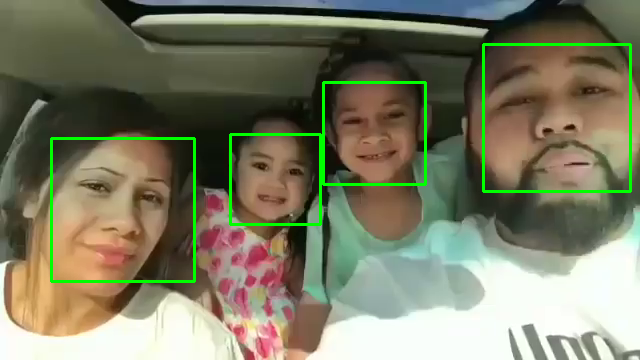

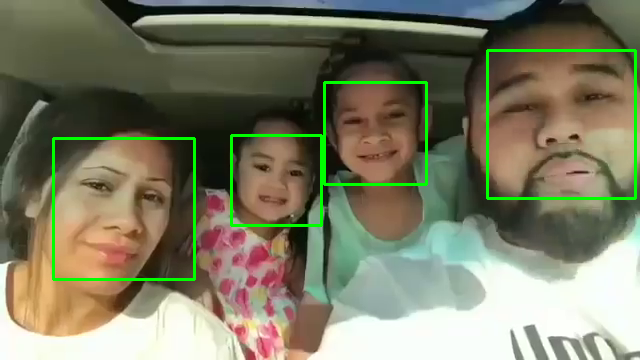

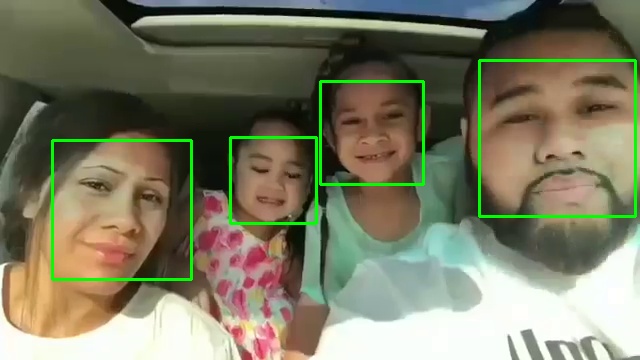

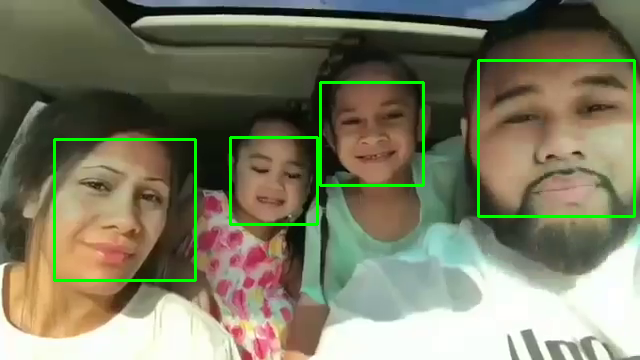

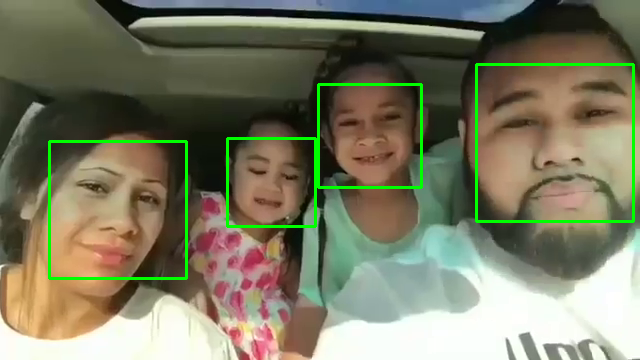

In [12]:
#video que vamos a analizar
video = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_vision/Images/familia_cantando.mp4')
#clasificador haar
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml')

for x in range(6):
  videoentrada.set(1,x);   
  #ret: retorno (true si es frame se lee correctamente)
  ret, frame = videoentrada.read()
  #convertimos el frame a gris
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #detectamos las caras en el frame
  faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
  for (x, y, w, h) in faces:
    #dibujamos rectángulos verdes alrededor de las caras
    cv2.rectangle(frame,(x,y),(x+w, y+h),(0, 255, 0),2)
  cv2_imshow(frame)


# Exportar video con caras


In [15]:
pip install pyprind

In [0]:
import sys
import time          #  calcular tiempo (en este caso tiempo de descarga de archivo)
import pyprind
#funcion para ver el avance de procesos en background
def reporthook(step, total_step):
    global start_time
    if step == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    speed = total_step / (1024.**2 * duration)
    percent = step *100 /total_step
    sys.stdout.write("\r%d pasos | %d frames -> %%.2f frames | %d segundos transcurrido" %
                    (step, percent, duration))
    sys.stdout.flush()
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml')
#video que analizaremos
videoentrada = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_vision/Images/familia_cantando.mp4')
#video resultante del análisis, definimos el codec DIVX
codec = cv2.VideoWriter_fourcc(*'DIVX')
# Definimos el fps = 20.0 y el tamaño de cada frame (640x360)
videosalida = cv2.VideoWriter('/content/drive/My Drive/IA/Computer_vision/Images/familia_cantando_haar2.avi',
                              codec, 20.0,(640,360))
framenum=0
while (videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for (x,y,w,h) in faces:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    videosalida.write(frame)
    reporthook(framenum, 1412)
    framenum=framenum+1
  else: break
videoentrada.release()
videosalida.release()


1411 pasos | 99 frames -> %.2f frames | 240 segundos transcurrido

# Reconociendo personas caminando


In [0]:
video_entrada2 = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_vision/Images/caminando.mp4')

In [67]:
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
totalframes = int(cv2.VideoCapture.get(video_entrada2, property_id))
print( "total de frames: "+str(totalframes) )
print(str(video_entrada2.get(3))+"x"+str(video_entrada2.get(4))+" pixeles")

total de frames: 1879
640.0x360.0 pixeles


In [68]:
#recorremos los 6 primeros frames de 1412
for x in range(6):
  videoentrada.set(1,x);   
  #ret: retorno (true si es frame se lee correctamente)
  ret, frame = video_entrada2.read()
  cv2_imshow(frame)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
body_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_vision/Python_files/HaarCascade/haarcascade_fullbody.xml')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
bodys = body_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)

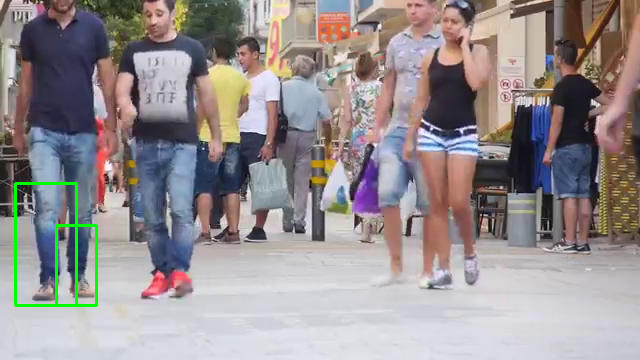

In [70]:
for (x, y, w, h) in bodys:
    cv2.rectangle(frame,(x,y),(x+w, y+h),(0, 255, 0),2)
cv2_imshow(frame)

In [71]:
#video que vamos a analizar
video = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_vision/Images/caminando.mp4')
#clasificador haar
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_vision/Python_files/HaarCascade/haarcascade_fullbody.xml')

for x in range(6):
  video_entrada2.set(1,x);   
  #ret: retorno (true si es frame se lee correctamente)
  ret, frame = video_entrada2.read()
  #convertimos el frame a gris
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #detectamos las caras en el frame
  faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
  for (x, y, w, h) in faces:
    #dibujamos rectángulos verdes alrededor de las caras
    cv2.rectangle(frame,(x,y),(x+w, y+h),(0, 255, 0),2)
  cv2_imshow(frame)


Output hidden; open in https://colab.research.google.com to view.

In [72]:
import sys
import time          #  calcular tiempo (en este caso tiempo de descarga de archivo)
import pyprind
#funcion para ver el avance de procesos en background
def reporthook(step, total_step):
    global start_time
    if step == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    speed = total_step / (1024.**2 * duration)
    percent = step *100 /total_step
    sys.stdout.write("\r%d pasos | %d frames -> %%.2f frames | %d segundos transcurrido" %
                    (step, percent, duration))
    sys.stdout.flush()
body_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_vision/Python_files/HaarCascade/haarcascade_fullbody.xml')
#video que analizaremos
video_entrada2 = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_vision/Images/caminando.mp4')
#video resultante del análisis, definimos el codec DIVX
codec = cv2.VideoWriter_fourcc(*'DIVX')
# Definimos el fps = 20.0 y el tamaño de cada frame (640x360)
video_salida = cv2.VideoWriter('/content/drive/My Drive/IA/Computer_vision/Images/personas_caminando2.mp4',
                              codec, 20.0,(640,360))
framenum=0
while (video_entrada2.isOpened()):
  ret, frame = video_entrada2.read()
  if ret == True:
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    bodys = body_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for (x,y,w,h) in bodys:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    video_salida.write(frame)
    reporthook(framenum, 1412)
    framenum=framenum+1
  else: break
video_entrada2.release()
video_salida.release()


1878 pasos | 133 frames -> %.2f frames | 275 segundos transcurrido